<a href="https://colab.research.google.com/github/JohnMakgakgaDS/nemisa-datathon-2022/blob/main/food_prices2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# South Africa - Food Prices Humanitarian Data Exchange 
## Data Overview

This dataset contains Food Prices data for South Africa, sourced from the World Food Programme Price Database. The World Food Programme Price Database covers foods such as maize, rice, beans, fish, and sugar for 98 countries and some 3000 markets. It is updated weekly but contains to a large extent monthly data. The data goes back as far as 1992 for a few countries, although many countries started reporting from 2003 or thereafter.

## Problem statement
what is the likelyhood of the prices increasing in the next years ?

A picture describing what we're doing

## Tabele of Content

1. Importing Packages

2. Loading Data

3. Exploratory Data Analysis (EDA)

4. Data Engineering

5. Modeling

6. Model Performance

7. Model Explanations

### Importing Packages

In [ ]:
#uploading data from local files
from google.colab import files
uploaded = files.upload()

Saving wfp_food_prices_zaf.csv to wfp_food_prices_zaf.csv


In [ ]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
import pandas as pd
import datetime

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading data
- In this section you are required to load the data into a DataFrame.

In [ ]:
# load data
df = pd.read_csv("wfp_food_prices_zaf.csv")

### Exploratory Data Analysis
- You are required to perform an in-depth analysis of all the variables in the DataFrame.

In [ ]:
# display the first 5 columns of the table
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
0,#date,#adm1+name,#adm2+name,#loc+market+name,#geo+lat,#geo+lon,#item+type,#item+name,#item+unit,#item+price+flag,#item+price+type,#currency,#value,#value+usd
1,2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.8,0.1321
2,2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,0.86,0.1413
3,2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Wheat,KG,actual,Wholesale,ZAR,0.65,0.1068
4,2000-02-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.8,0.126


In [ ]:
# look at data statistics
# number of columns & rows
df.shape

(811, 14)

In [ ]:
# sum of all available nulls
df.isna().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

In [ ]:
# Total of count of each feature
#Total count of unique values in each feature
df.describe()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
count,811,811,811,811,811,811,811,811,811,811,811,811,811,811
unique,271,2,2,2,2,2,2,4,2,2,2,2,363,707
top,2011-03-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.88,0.1633
freq,3,810,810,810,810,810,810,270,810,810,810,810,8,3


In [ ]:
# dataframe information
df.info

<bound method DataFrame.info of            date      admin1                           admin2  \
0         #date  #adm1+name                       #adm2+name   
1    2000-01-15     Gauteng  West Rand District Municipality   
2    2000-01-15     Gauteng  West Rand District Municipality   
3    2000-01-15     Gauteng  West Rand District Municipality   
4    2000-02-15     Gauteng  West Rand District Municipality   
..          ...         ...                              ...   
806  2022-05-15     Gauteng  West Rand District Municipality   
807  2022-05-15     Gauteng  West Rand District Municipality   
808  2022-06-15     Gauteng  West Rand District Municipality   
809  2022-06-15     Gauteng  West Rand District Municipality   
810  2022-06-15     Gauteng  West Rand District Municipality   

               market  latitude longitude            category       commodity  \
0    #loc+market+name  #geo+lat  #geo+lon          #item+type      #item+name   
1         Randfontein   -26.199    27

### Data Engineering
- clean the dataset, and possibly create new features - as identified in the EDA phase.

In [ ]:
# drop first row, index 0
df=df.drop(df.index[[0]])
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice
1,2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.8,0.1321
2,2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,0.86,0.1413
3,2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Wheat,KG,actual,Wholesale,ZAR,0.65,0.1068
4,2000-02-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.8,0.126
5,2000-02-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,0.83,0.1305


In [ ]:
# save data in df1 after grouping commodity with price
df1= df[["commodity","price"]].groupby(['commodity'],as_index=False)

In [ ]:
# diplay the first five rows
df1.head()

,commodity,price
1,Maize (white),0.8
2,Maize (yellow),0.86
3,Wheat,0.65
4,Maize (white),0.8
5,Maize (yellow),0.83
6,Wheat,0.69
7,Maize (white),0.75
8,Maize (yellow),0.73
9,Wheat,0.69
10,Maize (white),0.69


In [ ]:
# display commodity and price
df1.tail()

,commodity,price
796,Maize (white),3.69
797,Maize (yellow),3.82
798,Wheat,5.98
799,Maize (white),4.0
800,Maize (yellow),4.18
801,Wheat,6.88
802,Maize (white),4.2
803,Maize (yellow),4.33
804,Wheat,7.06
805,Maize (white),4.57


In [ ]:
#computing total numbers of commodities
df['commodity'].value_counts()

Maize (white)     270
Maize (yellow)    270
Wheat             270
Name: commodity, dtype: int64

In [ ]:
# the sum of the price values
df['price'].sum()

'0.80.860.650.80.830.690.750.730.690.690.670.70.670.680.80.60.610.80.540.530.760.510.50.750.540.540.840.620.630.950.670.710.980.690.740.980.80.821.040.840.891.00.820.861.030.810.821.050.760.771.070.780.81.030.90.881.020.980.921.011.00.981.051.061.051.131.281.231.241.551.481.421.741.651.461.851.521.422.011.471.421.921.391.381.781.311.231.751.351.331.71.391.491.741.491.691.761.541.961.761.471.971.81.41.721.741.351.451.531.31.31.11.091.260.890.941.150.790.831.070.880.91.090.890.921.040.830.860.980.860.881.10.90.931.070.880.931.040.910.971.081.091.11.081.31.291.151.331.381.091.081.221.041.111.21.071.051.081.110.991.01.00.880.90.930.940.960.910.920.950.970.90.940.960.970.960.950.820.880.880.660.730.920.540.650.910.530.60.910.550.610.870.560.610.920.580.610.960.610.630.950.650.620.960.80.711.010.850.761.110.930.811.071.140.881.041.130.951.021.020.961.11.141.011.091.091.01.091.21.071.241.341.21.361.41.261.441.291.211.321.331.251.451.341.281.621.381.481.521.421.61.441.421.571.751.51.641.841.97

In [ ]:
#formatting the values of price since they not adding up
df['price'] = pd.to_numeric(df['price'].str.replace('.', '.'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
#formatting the values of usdprice since they not adding up
df['usdprice'] = pd.to_numeric(df['usdprice'].str.replace('.', '.'))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [ ]:
#checking first five values of price
df['price'].head()

1    0.80
2    0.86
3    0.65
4    0.80
5    0.83
Name: price, dtype: float64

In [ ]:
#computing sum of prices
df['price'].sum()

1877.55

In [ ]:
#catogorising commodity types 
df=pd.concat([df, pd.get_dummies(df.commodity)], axis=1)

In [ ]:
#display dataset

df

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,Maize (white),Maize (yellow),Wheat
1,2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.80,0.1321,1,0,0
2,2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,0.86,0.1413,0,1,0
3,2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Wheat,KG,actual,Wholesale,ZAR,0.65,0.1068,0,0,1
4,2000-02-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.80,0.1260,1,0,0
5,2000-02-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,0.83,0.1305,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,2022-05-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,4.86,0.3185,0,1,0
807,2022-05-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Wheat,KG,actual,Wholesale,ZAR,8.02,0.5256,0,0,1
808,2022-06-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,4.42,0.2897,1,0,0
809,2022-06-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,4.47,0.2930,0,1,0


In [ ]:
# display first five values from date
df["date"].head()

1    2000-01-15
2    2000-01-15
3    2000-01-15
4    2000-02-15
5    2000-02-15
Name: date, dtype: object

In [ ]:
#sorting dates 
df=df.sort_values(by='date')
print(df.head())

         date   admin1                           admin2       market latitude  \
1  2000-01-15  Gauteng  West Rand District Municipality  Randfontein  -26.199   
2  2000-01-15  Gauteng  West Rand District Municipality  Randfontein  -26.199   
3  2000-01-15  Gauteng  West Rand District Municipality  Randfontein  -26.199   
4  2000-02-15  Gauteng  West Rand District Municipality  Randfontein  -26.199   
5  2000-02-15  Gauteng  West Rand District Municipality  Randfontein  -26.199   

  longitude            category       commodity unit priceflag  pricetype  \
1    27.669  cereals and tubers   Maize (white)   KG    actual  Wholesale   
2    27.669  cereals and tubers  Maize (yellow)   KG    actual  Wholesale   
3    27.669  cereals and tubers           Wheat   KG    actual  Wholesale   
4    27.669  cereals and tubers   Maize (white)   KG    actual  Wholesale   
5    27.669  cereals and tubers  Maize (yellow)   KG    actual  Wholesale   

  currency  price  usdprice  Maize (white)  Maize 

In [ ]:
# extracting year from the date
df['year'] = pd.DatetimeIndex(df['date']).year
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,Maize (white),Maize (yellow),Wheat,year
1,2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.80,0.1321,1,0,0,2000
2,2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,0.86,0.1413,0,1,0,2000
3,2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Wheat,KG,actual,Wholesale,ZAR,0.65,0.1068,0,0,1,2000
4,2000-02-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.80,0.1260,1,0,0,2000
5,2000-02-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,0.83,0.1305,0,1,0,2000


In [ ]:
# extracting month from the date
df['month'] = pd.DatetimeIndex(df['date']).month
df.head()

,date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,Maize (white),Maize (yellow),Wheat,year,month
1,2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.80,0.1321,1,0,0,2000,1
2,2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,0.86,0.1413,0,1,0,2000,1
3,2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Wheat,KG,actual,Wholesale,ZAR,0.65,0.1068,0,0,1,2000,1
4,2000-02-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.80,0.1260,1,0,0,2000,2
5,2000-02-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,0.83,0.1305,0,1,0,2000,2


In [ ]:
#set index to date feature
df=df.set_index('date')
df.head()

,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,Maize (white),Maize (yellow),Wheat,year,month
date,,,,,,,,,,,,,,,,,,
2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.80,0.1321,1,0,0,2000,1
2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,0.86,0.1413,0,1,0,2000,1
2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Wheat,KG,actual,Wholesale,ZAR,0.65,0.1068,0,0,1,2000,1
2000-02-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.80,0.1260,1,0,0,2000,2
2000-02-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,0.83,0.1305,0,1,0,2000,2


In [ ]:
#set index to date None
df.index.names = [None]
 
df.head()

,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,Maize (white),Maize (yellow),Wheat,year,month
2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.80,0.1321,1,0,0,2000,1
2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,0.86,0.1413,0,1,0,2000,1
2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Wheat,KG,actual,Wholesale,ZAR,0.65,0.1068,0,0,1,2000,1
2000-02-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.80,0.1260,1,0,0,2000,2
2000-02-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,0.83,0.1305,0,1,0,2000,2


In [ ]:
#rename none column to date
df=df.rename_axis("date", axis="columns")
df.head()

date,admin1,admin2,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,Maize (white),Maize (yellow),Wheat,year,month
2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.80,0.1321,1,0,0,2000,1
2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,0.86,0.1413,0,1,0,2000,1
2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Wheat,KG,actual,Wholesale,ZAR,0.65,0.1068,0,0,1,2000,1
2000-02-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.80,0.1260,1,0,0,2000,2
2000-02-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,0.83,0.1305,0,1,0,2000,2


In [ ]:
# renaming admin1  to Province
df.columns = df.columns.str.replace('admin1', 'Province')
# renaming admin1  to Province
df.columns = df.columns.str.replace('admin2', 'City')

In [ ]:
#display first five rows of dataset
df.head()

date,Province,City,market,latitude,longitude,category,commodity,unit,priceflag,pricetype,currency,price,usdprice,Maize (white),Maize (yellow),Wheat,year,month
2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.80,0.1321,1,0,0,2000,1
2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,0.86,0.1413,0,1,0,2000,1
2000-01-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Wheat,KG,actual,Wholesale,ZAR,0.65,0.1068,0,0,1,2000,1
2000-02-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (white),KG,actual,Wholesale,ZAR,0.80,0.1260,1,0,0,2000,2
2000-02-15,Gauteng,West Rand District Municipality,Randfontein,-26.199,27.669,cereals and tubers,Maize (yellow),KG,actual,Wholesale,ZAR,0.83,0.1305,0,1,0,2000,2


Downloading data to the csv file

In [ ]:

#df.to_csv('food_prices_cleaned.csv')

In [ ]:
#df.to_csv("food_prices_cleaned.csv", index=False, header=True)

In [ ]:
from google.colab import files
files.download("food_prices_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#evaluate year feature
df['year'].value_counts()

2000    36
2012    36
2021    36
2020    36
2019    36
2018    36
2017    36
2016    36
2015    36
2014    36
2013    36
2011    36
2001    36
2010    36
2009    36
2008    36
2007    36
2006    36
2005    36
2004    36
2003    36
2002    36
2022    18
Name: year, dtype: int64

### Visualisation
- Evaluating the data through visuals

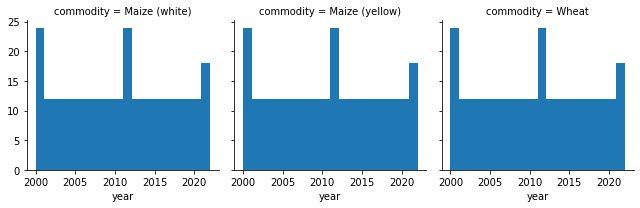

In [ ]:
# coomodity of maize, yellow and whtie are the same including wheat
g = sns.FacetGrid(df, col='commodity')
g.map(plt.hist, 'year', bins=20)

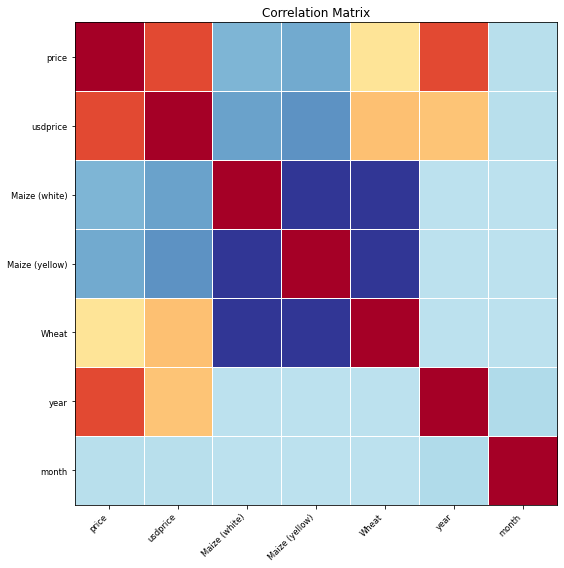

In [ ]:
#price is correlated to usdprice
#maize(white) is correlated to price
#maize(yellow) is correlated to price
#wheat is correlated to price
#year is correlated to price
#month is correlated to price
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(8,8));
ax = fig.add_subplot(111);
plot_corr(df.corr(), xnames = df.corr().columns, ax = ax);

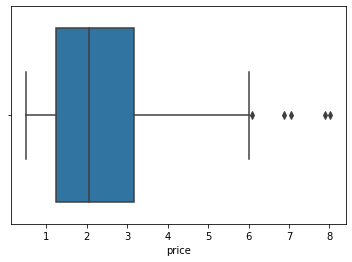

In [ ]:
# have a look at feature distributions and price data is skewed to the left
sns.boxplot(x='price', data=df);

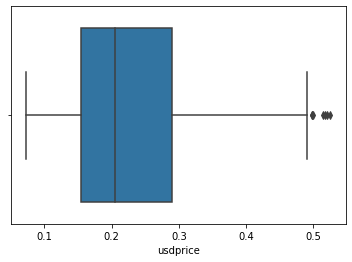

In [ ]:
# have a look at feature distributions and usd price is skewed to the left
sns.boxplot(x='usdprice', data=df);

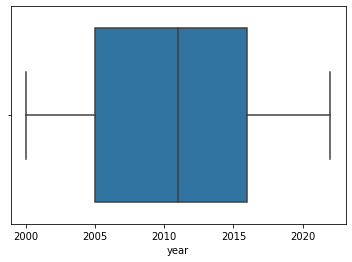

In [ ]:
# have a look at feature distributions and year is normal
sns.boxplot(x='year', data=df);